In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp


In [2]:
def xdot(state, t, r):
    x, y = state
    return [
        r*x*(1 - (c/r)*x)*((x - mu)/(nu + x)) - ((alpha * x * y)/(beta + x)),
        gamma * (alpha*x*y)/(beta + x) - delta * y]

In [8]:
#Make paraters global
global c
global mu
global nu
global alpha
global beta
global gamma
global delta 

c = 0.19
mu = 0.03
nu = 0.003
alpha = 800
beta = 1.5
gamma = 0.004
delta = 2.2

In [26]:
timespan = (0., 100.)
x0 = 1
y0 = 1
r = 1.5

initial_conditions = [x0, y0]

sol = solve_ivp(lambda t, y: xdot(y, t, r), t_span=timespan, y0=initial_conditions, max_step = 0.1)

x, y = sol.y


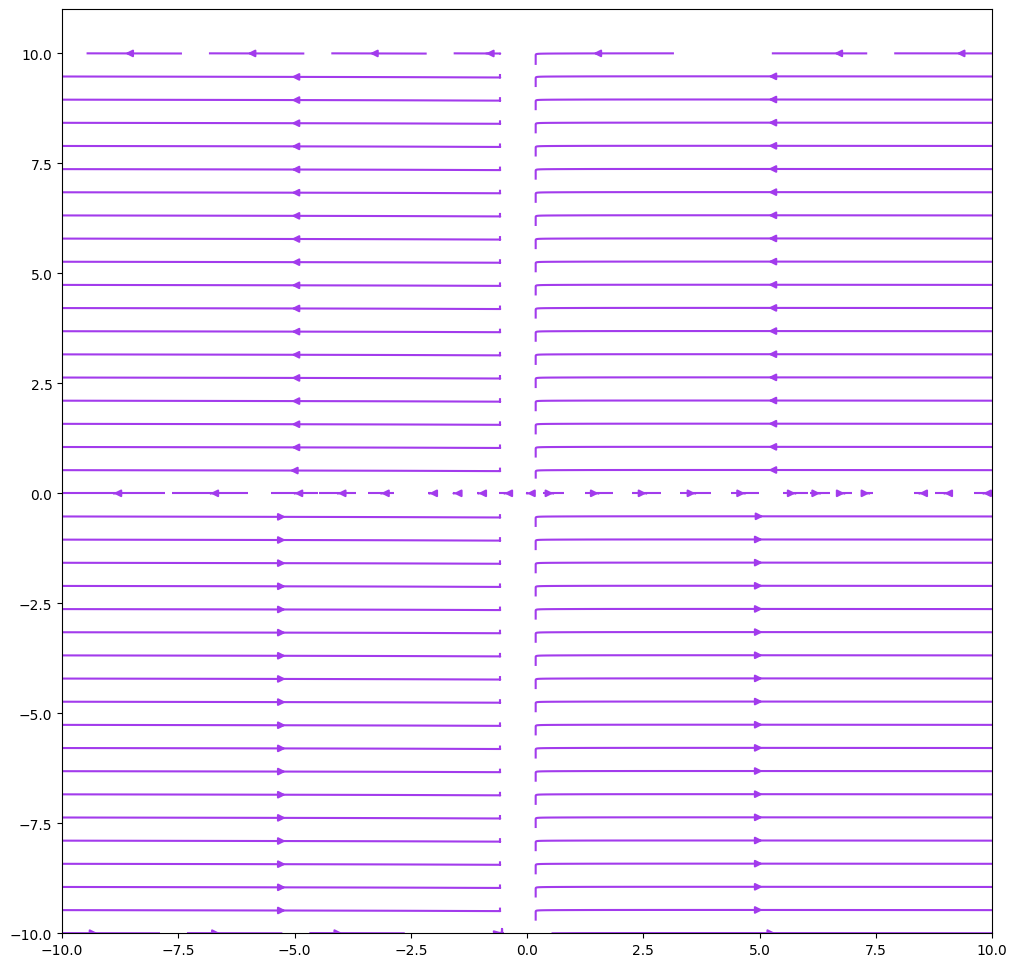

In [27]:
`fig, axs = plt.subplots(1, 1, figsize =(12, 12))
#Vector field
xvect, yvect= np.meshgrid(np.linspace(-10, 10, 20),  
                   np.linspace(-10, 10, 20))

#Update vector field
u = r*xvect*(1 - (c/r)*xvect)*((xvect - mu)/(nu + xvect)) - ((alpha * xvect * yvect)/(beta + xvect))
v = gamma * (alpha*xvect*yvect)/(beta + xvect) - delta * yvect

#Plotting Stream plot
axs.streamplot(xvect,yvect,u,v, density=1.3, linewidth=None, color='#A23BEC' ) 